In [14]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [15]:
df = pd.read_csv("../data/diabetes.csv")
df = df.drop_duplicates()
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Results  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


In [16]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Results
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [17]:
df_features = list(df.columns)
print(df_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Results']


In [18]:
x = df.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

0    491
1    253
Name: Results, dtype: int64


(array([491.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

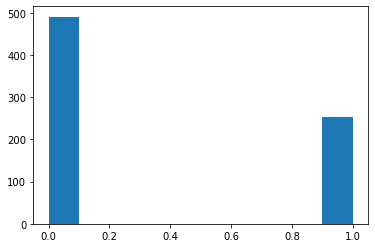

In [19]:
plt.hist(y)

0    361
1    253
Name: Results, dtype: int64


(array([361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

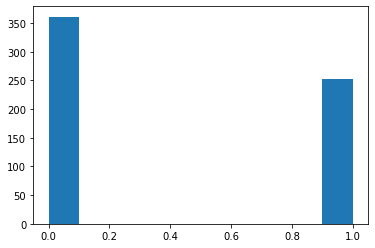

In [20]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    361
1    361
Name: Results, dtype: int64


(array([361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 361.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

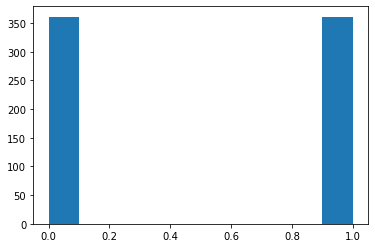

In [21]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

Accuracy(%) =  73.10344827586206
Number of mislabeled points : 39 / 145
F1 Score (%) =  76.07361963190185
Precision (%) =  76.5432098765432
Recall (%) =  75.60975609756098


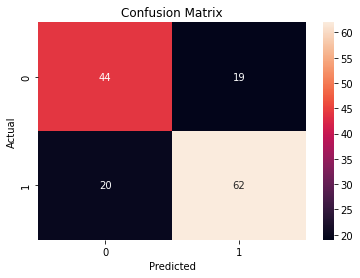

In [23]:
# creating a Nave Bayers classifier
model =KNeighborsClassifier(n_neighbors=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = model.predict(X_test)



accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
f1_score = sm.f1_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("Number of mislabeled points :",(Y_test != Y_pred).sum(),"/" ,  X_test.shape[0])
print("F1 Score (%) = ",f1_score*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)

cf_matrix = confusion_matrix(Y_test, Y_pred)
    

ax= plt.subplot()
sb.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix');
